<a href="https://colab.research.google.com/github/srivishnu2805/Machine_Learning-23249-/blob/main/SVM/SVM_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

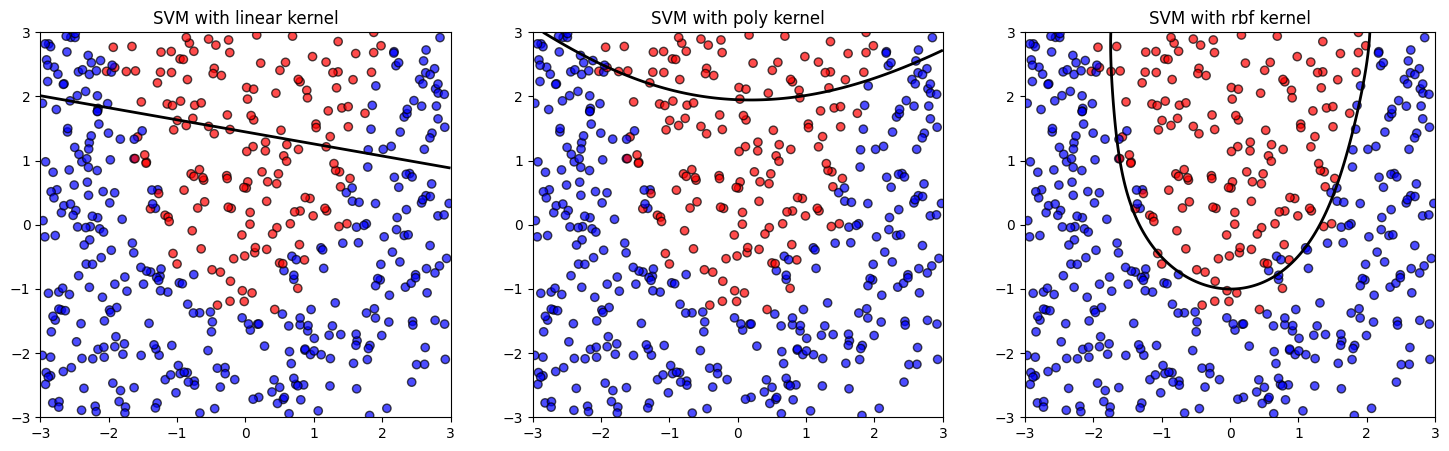

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

np.random.seed(42)

X = np.random.uniform(-3, 3, (500, 2))
y = (X[:, 1] > X[:, 0]**2 - 1.5 + np.random.normal(0, 0.5, 500)).astype(int)

kernels = ["linear", "poly", "rbf"]

plt.figure(figsize=(18,5))

for i, kernel in enumerate(kernels, 1):
    clf = SVC(kernel=kernel, C=1, gamma="scale")
    clf.fit(X, y)

    xx, yy = np.meshgrid(np.linspace(-3,3,300), np.linspace(-3,3,300))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i)
    plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr", edgecolors="k", alpha=0.7)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")
    plt.title(f"SVM with {kernel} kernel")

plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.91      0.79        81
           1       0.50      0.18      0.26        39

    accuracy                           0.68       120
   macro avg       0.60      0.55      0.53       120
weighted avg       0.63      0.68      0.62       120

Confusion Matrix:
 [[74  7]
 [32  7]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


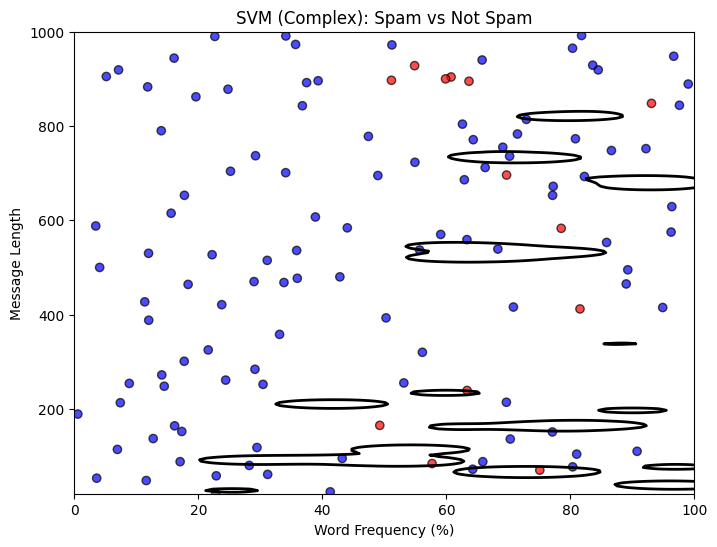

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

np.random.seed(42)
n = 400

word_freq = np.random.rand(n) * 100               # % spammy words
msg_length = np.random.randint(20, 1000, n)       # length of email
punct_count = np.random.randint(0, 50, n)         # punctuation usage
upper_ratio = np.random.rand(n)                   # fraction of uppercase letters
num_links = np.random.randint(0, 10, n)           # number of links

labels = np.where(
    (word_freq > 40) & (num_links > 2) & (upper_ratio > 0.3) | (msg_length < 100),
    1, 0
)

df = pd.DataFrame({
    "word_freq": word_freq,
    "msg_length": msg_length,
    "punct_count": punct_count,
    "upper_ratio": upper_ratio,
    "num_links": num_links,
    "spam": labels
})

X = df[["word_freq", "msg_length", "punct_count", "upper_ratio", "num_links"]]
y = df["spam"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = SVC(kernel="rbf", C=5, gamma=0.01, probability=True)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(8,6))
plt.scatter(X_test["word_freq"], X_test["msg_length"], c=y_pred, cmap="bwr", edgecolors="k", alpha=0.7)

xx, yy = np.meshgrid(np.linspace(0,100,300), np.linspace(20,1000,300))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel(),
                                np.zeros(300*300), np.zeros(300*300), np.zeros(300*300)])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")
plt.xlabel("Word Frequency (%)")
plt.ylabel("Message Length")
plt.title("SVM (Complex): Spam vs Not Spam")
plt.show()